In [2]:
import pandas as pd
import subprocess
import os
import re
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import itertools


In [5]:
!samtools mpileup /rna/myk/analysis/class/guided_mission_bio/binfo1-datapack1/CLIP-35L33G.bam > CLIP-35L33G.pileup

[mpileup] 1 samples in 1 input files
^C


In [ ]:
!awk '$3 == "gene" && $7 == "-" {print $1"\t"$4"\t"$5}' /rna/myk/analysis/class/guided_mission_bio/binfo1-datapack1/gencode.gtf > /rna/myk/analysis/class/guided_mission_bio/binfo1-datapack1/gencode_negstrand.gtf.bed

In [20]:
chromosomes = list(map(str, range(1, 20))) + ['X', 'Y']
input_bam = "/rna/myk/analysis/class/guided_mission_bio/binfo1-datapack1/CLIP-35L33G.bam"

for chr in chromosomes:
    output_bam = f"/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_chr/CLIP-chr{chr}.bam"
    command = ["samtools", "view", "-b", "-o", output_bam, input_bam, f"chr{chr}"]
    subprocess.run(command)

[main_samview] region "chr20" specifies an invalid region or unknown reference. Continue anyway.


In [19]:
!samtools view /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_chr/CLIP-chr1.bam | head

SRR458758.23028115	0	chr1	3056473	0	20M	*	0	0	GAATGGAAGTTCAAGGATCT	HHGHHGE@GGHHED?GEGDG	MD:Z:20	NH:i:40	HI:i:1	NM:i:0	SM:i:0	XQ:i:40	X2:i:40	XO:Z:UM	XS:A:-
SRR458758.23879202	0	chr1	3056473	0	20M	*	0	0	GAATGGAAGTTCAAGGATCT	GBGGEEAAF=CEEDEGBGG>	MD:Z:20	NH:i:40	HI:i:1	NM:i:0	SM:i:0	XQ:i:40	X2:i:40	XO:Z:UM	XS:A:-
SRR458758.23893532	0	chr1	3056473	0	20M	*	0	0	GAATGGAAGTTCAAGGATCT	G@?GGE=EFBDDGGGGD@GG	MD:Z:20	NH:i:40	HI:i:1	NM:i:0	SM:i:0	XQ:i:40	X2:i:40	XO:Z:UM	XS:A:-
SRR458758.26501547	0	chr1	3056473	0	20M	*	0	0	GAATGGAAGTTCAAGGATCT	IIIHIIIHIGHIIIHEHIHH	MD:Z:20	NH:i:40	HI:i:1	NM:i:0	SM:i:0	XQ:i:40	X2:i:40	XO:Z:UM	XS:A:-
SRR458758.685997	16	chr1	3059006	0	22M	*	0	0	TTCATTTACAGAATGGAATACT	EG7:776DGGGBD<GGEBGEG@	MD:Z:22	NH:i:30	HI:i:1	NM:i:0	SM:i:0	XQ:i:40	X2:i:40	XO:Z:UM	XS:A:+
SRR458758.12045118	16	chr1	3059006	0	22M	*	0	0	TTCATTTACAGAATGGAATACT	IFGIDDIHIHEIIIIIIIIHBI	MD:Z:22	NH:i:30	HI:i:1	NM:i:0	SM:i:0	XQ:i:40	X2:i:40	XO:Z:UM	XS:A:+
SRR458758.15313921	16	chr1	3059006	0	22M	*	0	0	TTCATTTAC

In [21]:
chromosomes = list(map(str, range(1, 20))) + ['X', 'Y']
input_dir = "/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_chr"
output_dir = "/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup"

for chr in chromosomes:
    input_bam = f"{input_dir}/CLIP-chr{chr}.bam"
    output_pileup = f"{output_dir}/CLIP-chr{chr}.pileup"
    command = f"samtools mpileup {input_bam} > {output_pileup}"
    subprocess.run(command, shell=True)

[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files


In [23]:
!head /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr3.pileup

chr3	3000455	N	2	^!t^!t	IG
chr3	3000456	N	2	tt	IE
chr3	3000457	N	2	tt	II
chr3	3000458	N	2	cc	IG
chr3	3000459	N	2	aa	II
chr3	3000460	N	2	cc	ID
chr3	3000461	N	2	gg	II
chr3	3000462	N	2	tt	BI
chr3	3000463	N	2	cc	HG
chr3	3000464	N	2	cc	IH


In [39]:
!awk 'BEGIN {s=0} {s += $4} END {print "Mean: " s / NR}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP-35L33G.pileup

Mean: 16.3799


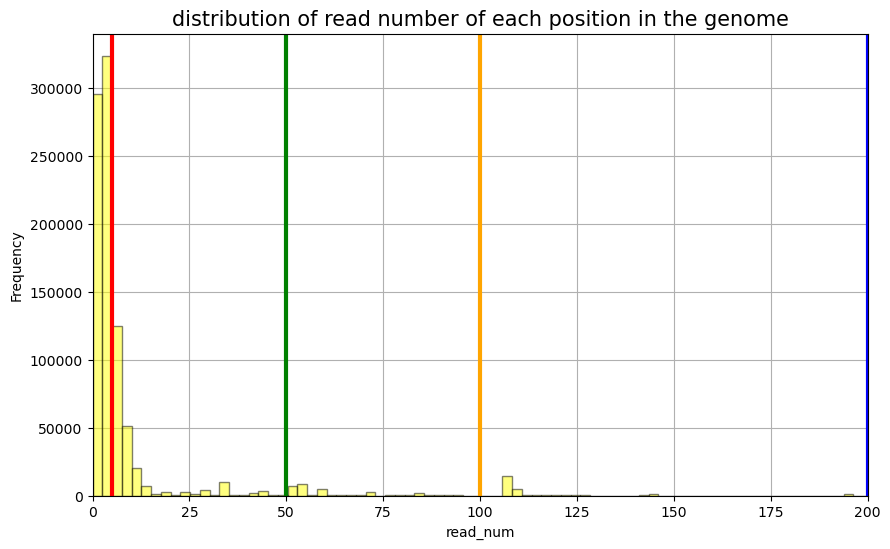

In [3]:
file_path = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP-35L33G.pileup'
pileup_data = pd.read_csv(file_path, delimiter='\t', header=None)


fourth_column_data = pileup_data.iloc[:, 3]

plt.figure(figsize=(10, 6))
plt.hist(fourth_column_data, bins=400, color = 'yellow', alpha = 0.5, edgecolor='black', zorder=2)
plt.xlim(0, 200)
plt.xlabel('read_num')
plt.ylabel('Frequency')
plt.axvline(5, color='red', linestyle='-', linewidth=3)
plt.axvline(50, color='green', linestyle='-', linewidth=3)
plt.axvline(100, color='orange', linestyle='-', linewidth=3)
plt.axvline(200, color='blue', linestyle='-', linewidth=3)
plt.grid(True, zorder=1)
plt.title('distribution of read number of each position in the genome', fontsize = 15)
plt.show()

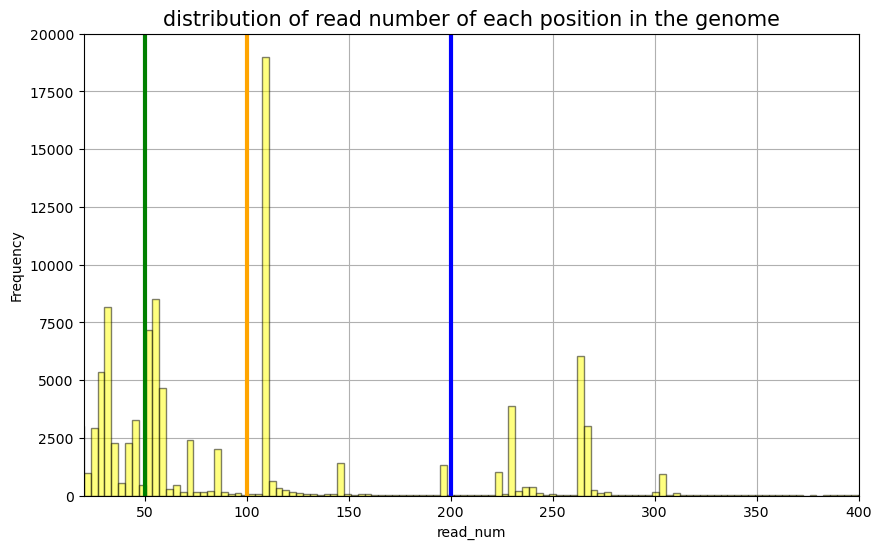

In [4]:
file_path = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP-35L33G.pileup'
pileup_data = pd.read_csv(file_path, delimiter='\t', header=None)

fourth_column_data = pileup_data.iloc[:, 3]

plt.figure(figsize=(10, 6))
plt.hist(fourth_column_data, bins=300, color = 'yellow', alpha = 0.5, edgecolor='black', zorder=2)
plt.xlim(20, 400)
plt.ylim(0, 20000)
plt.xlabel('read_num')
plt.ylabel('Frequency')
plt.axvline(5, color='red', linestyle='-', linewidth=3)
plt.axvline(50, color='green', linestyle='-', linewidth=3)
plt.axvline(100, color='orange', linestyle='-', linewidth=3)
plt.axvline(200, color='blue', linestyle='-', linewidth=3)
plt.grid(True, zorder=1)
plt.title('distribution of read number of each position in the genome', fontsize = 15)
plt.show()

In [40]:
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr1.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr1_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr2.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr2_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr3.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr3_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr4.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr4_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr5.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr5_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr6.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr6_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr7.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr7_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr8.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr8_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr9.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr9_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr10.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr10_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr11.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr11_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr12.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr12_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr13.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr13_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr14.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr14_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr15.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr15_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr16.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr16_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr17.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr17_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr18.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr18_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr19.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr19_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chrX.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chrX_depth.pileup
!awk '$4 > 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chrY.pileup > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chrY_depth.pileup

In [5]:
!awk '$4 < 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr3.pileup | wc -l
!awk '$4 < 10 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr3_depth.pileup | wc -l

43365511
0


In [6]:
directory = "/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth"
chromosomes = list(map(str, range(1, 20))) + ['X', 'Y']
line_counts = {}

for chr in chromosomes:
    file_path = os.path.join(directory, f"CLIP-chr{chr}_depth.pileup")
    try:
        with open(file_path, 'r') as file:
            count = sum(1 for _ in file)
        line_counts[f"CLIP-chr{chr}_depth.pileup"] = count
    except FileNotFoundError:
        line_counts[f"CLIP-chr{chr}_depth.pileup"] = "File not found"

print(line_counts)


{'CLIP-chr1_depth.pileup': 17174102, 'CLIP-chr2_depth.pileup': 15366856, 'CLIP-chr3_depth.pileup': 10723810, 'CLIP-chr4_depth.pileup': 11551851, 'CLIP-chr5_depth.pileup': 11587124, 'CLIP-chr6_depth.pileup': 9545932, 'CLIP-chr7_depth.pileup': 9685567, 'CLIP-chr8_depth.pileup': 9675286, 'CLIP-chr9_depth.pileup': 10256749, 'CLIP-chr10_depth.pileup': 9090405, 'CLIP-chr11_depth.pileup': 14292143, 'CLIP-chr12_depth.pileup': 8575377, 'CLIP-chr13_depth.pileup': 9183836, 'CLIP-chr14_depth.pileup': 7980832, 'CLIP-chr15_depth.pileup': 7381944, 'CLIP-chr16_depth.pileup': 6335361, 'CLIP-chr17_depth.pileup': 7669945, 'CLIP-chr18_depth.pileup': 5987045, 'CLIP-chr19_depth.pileup': 4097127, 'CLIP-chrX_depth.pileup': 7954935, 'CLIP-chrY_depth.pileup': 343564}


In [261]:
!awk '$4 == 3 {print $0}' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup/CLIP-chr3.pileup | wc -l
!awk '$4 == 3' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth/CLIP-chr3_depth.pileup | wc -l

5244037
0


In [7]:
directory = "/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_pileup_depth"
pileup_data = {}

for chr in chromosomes:
    file_path = os.path.join(directory, f"CLIP-chr{chr}_depth.pileup")
    try:
        df = pd.read_csv(file_path, sep='\t', names=['chrom', 'pos', 'ref', 'count', 'basereads', 'quals'])
        pileup_data[f"chr{chr}"] = df
    except FileNotFoundError:
        print(f"File not found: {file_path}")


In [11]:
pileup_data['chr1']

,chrom,pos,ref,count,basereads,quals,matches
0,chr1,3062257,N,16,^$T^$T^$T^$T^$T^$T^$T^$T^$T^$T^$T^$T^$T^$T^$T^$T,DIIEIHIII?@IFHHI,TTTTTTTTTTTTTTTT
1,chr1,3062258,N,16,TTTTTTTTTTTTTTTT,GIIDIBIIIEGIII>D,TTTTTTTTTTTTTTTT
2,chr1,3062259,N,16,CCCCCCCCCCCCCCCC,@IIDIHIIIDGIBHHI,CCCCCCCCCCCCCCCC
3,chr1,3062260,N,16,AAAAAAAAAAAAAAAA,GIIGIHIIIDDIIIHG,AAAAAAAAAAAAAAAA
4,chr1,3062261,N,16,GGGGGGGGGGGGGGGG,@IIGI@IIIGGIIIHD,GGGGGGGGGGGGGGGG
...,...,...,...,...,...,...,...
17174097,chr1,195026888,N,12,AAAAAAAAAAAA,IGDGEG8IHDDD,AAAAAAAAAAAA
17174098,chr1,195026889,N,12,AAAAAAAAAAAA,GG@IFG;IF@GD,AAAAAAAAAAAA
17174099,chr1,195026890,N,12,TTTTTTTTTTTT,IGDIEDAIGDDG,TTTTTTTTTTTT
17174100,chr1,195026891,N,12,AAAAAAAAAAAA,G5EIEGCIG7=E,AAAAAAAAAAAA


In [8]:
tokeep = re.compile('[^AGCTagct]')
for chr_key in pileup_data.keys():
    pileup_data[chr_key]['matches'] = pileup_data[chr_key]['basereads'].apply(lambda x: tokeep.sub('', x))

In [9]:
pileup_new = {}

for chr_key in pileup_data.keys():
    pileup_new[chr_key] = pileup_data[chr_key][['chrom', 'pos', 'matches']]
    pileup_new[chr_key]['matches'] = pileup_new[chr_key]['matches'].str.upper()

/tmp/ipykernel_155663/1052848703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_new[chr_key]['matches'] = pileup_new[chr_key]['matches'].str.upper()
/tmp/ipykernel_155663/1052848703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_new[chr_key]['matches'] = pileup_new[chr_key]['matches'].str.upper()
/tmp/ipykernel_155663/1052848703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [10]:
for chr_key in pileup_data.keys():
    pileup_new[chr_key] = pileup_new[chr_key][pileup_new[chr_key]['matches'].str.len() >= 50]

In [12]:
def calculate_shannon_entropy(base_counts):
    total = sum(base_counts.values())
    entropy = 0
    for count in base_counts.values():
        if count > 0:
            p = count / total
            entropy -= p * np.log2(p)
    return entropy



for chr_key in pileup_data.keys():
    entropies = []
    for index, row in pileup_new[chr_key].iterrows():
        base_counts = Counter(row['matches'])
        entropy = calculate_shannon_entropy(base_counts)
        entropies.append(entropy)
    pileup_new[chr_key]['shannon_entropy'] = entropies

In [13]:
shannon_entropy_values = []
for chr_key in pileup_data.keys():
    shannon_entropy_values += pileup_new[chr_key]['shannon_entropy'].tolist()

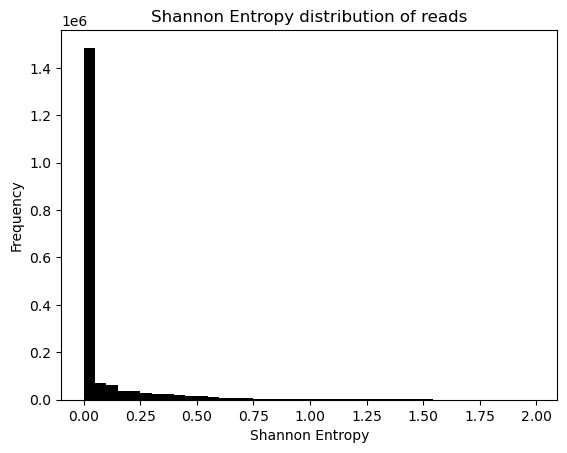

In [14]:
plt.hist(shannon_entropy_values, bins=40, color='k')
plt.xlabel('Shannon Entropy')
plt.ylabel('Frequency')
plt.title('Shannon Entropy distribution of reads')
plt.show()
#plt.xlim(0.2,2)
#plt.ylim(0, 100000)

0.07495320741991689
0.0


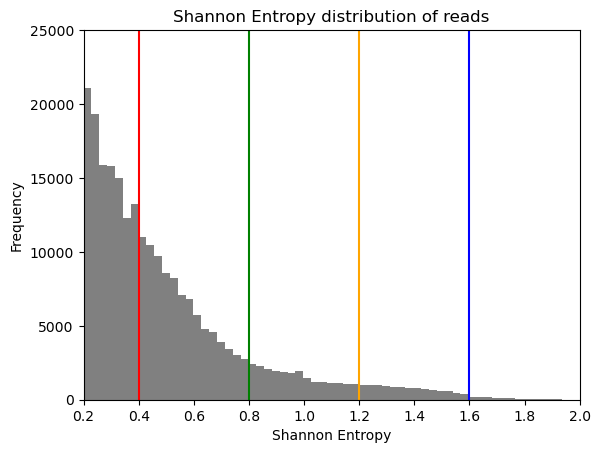

In [15]:
plt.hist(shannon_entropy_values, bins=70, color = 'grey')
plt.xlim(0.2,2)
plt.ylim(0, 25000)
plt.axvline(0.4, c='red')
plt.axvline(0.8, c='green')
plt.axvline(1.2, c='orange')
plt.axvline(1.6, c='blue')
plt.xlabel('Shannon Entropy')
plt.ylabel('Frequency')
plt.title('Shannon Entropy distribution of reads')
print(np.mean(shannon_entropy_values))
print(np.median(shannon_entropy_values))

In [273]:
count_greater_than_05 = sum(1 for x in shannon_entropy_values if x > 0.5)
count_greater_than_08 = sum(1 for x in shannon_entropy_values if x > 0.8)
count_greater_than_1 = sum(1 for x in shannon_entropy_values if x > 1)
count_all = len(shannon_entropy_values)
print(count_greater_than_05)
print(count_greater_than_08)
print(count_greater_than_1)
print(count_all)
print(count_greater_than_05 / count_all)
print(count_greater_than_08 / count_all)
print(count_greater_than_1 / count_all)

88757
34407
19930
1891368
0.04692740915570106
0.018191594655297117
0.010537346513211601


In [16]:
pileup_shn_08 = {}

for chr_key in pileup_data.keys():
    pileup_shn_08[chr_key] = pileup_new[chr_key][pileup_new[chr_key]['shannon_entropy'] > 0.8]

In [17]:
pileup_shn = pd.concat([pileup_shn_08[f'chr{i}'] for i in range(1, 20)] + [pileup_shn_08['chrX'], pileup_shn_08['chrY']])
pileup_shn

,chrom,pos,matches,shannon_entropy
356,chr1,3222726,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,1.401164
554,chr1,3224576,CCCGGGGGGGGGCGGGGGGGGGGGGGGGCTCTGCCCCCCCGCCCGG...,1.261116
5302,chr1,4329962,CCCCCCCCCCCCCTTTCCCTTTTCTTCGGCGGGCCCCCCCCCCCTT...,1.300060
5755,chr1,4631665,GGGGGGGGGGGGGGGGGCGGCGCGGGGAGGAGAAGAAGAGGAAAAA...,1.037749
6199,chr1,4636203,GGGGGGGGGGGGGGGGGGAACCCCCCCGGGGGGGGGGGGGAAGAGG...,1.001903
...,...,...,...,...
324267,chrY,90811215,GGGGAGGGAAAAAAAAAAAAAGGGGGGGGGGGGGGGGGGGGGGGGG...,0.855451
324273,chrY,90811221,GGGGGGGGGGTTTTTTTTTTTTTGGGGGGGGGGGGGGGGGGGGGGG...,0.811278
325890,chrY,90812838,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,0.821775
333327,chrY,90820275,AGGGGGGAGAGGACGAAAGAGGGAGGAGAGCGCCAGGGAGGACGCA...,1.295107


In [18]:
pileup_shn['start'] = pileup_shn['pos'] - 6
pileup_shn['end'] = pileup_shn['pos'] + 5
pileup_shn

,chrom,pos,matches,shannon_entropy,start,end
356,chr1,3222726,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,1.401164,3222720,3222731
554,chr1,3224576,CCCGGGGGGGGGCGGGGGGGGGGGGGGGCTCTGCCCCCCCGCCCGG...,1.261116,3224570,3224581
5302,chr1,4329962,CCCCCCCCCCCCCTTTCCCTTTTCTTCGGCGGGCCCCCCCCCCCTT...,1.300060,4329956,4329967
5755,chr1,4631665,GGGGGGGGGGGGGGGGGCGGCGCGGGGAGGAGAAGAAGAGGAAAAA...,1.037749,4631659,4631670
6199,chr1,4636203,GGGGGGGGGGGGGGGGGGAACCCCCCCGGGGGGGGGGGGGAAGAGG...,1.001903,4636197,4636208
...,...,...,...,...,...,...
324267,chrY,90811215,GGGGAGGGAAAAAAAAAAAAAGGGGGGGGGGGGGGGGGGGGGGGGG...,0.855451,90811209,90811220
324273,chrY,90811221,GGGGGGGGGGTTTTTTTTTTTTTGGGGGGGGGGGGGGGGGGGGGGG...,0.811278,90811215,90811226
325890,chrY,90812838,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,0.821775,90812832,90812843
333327,chrY,90820275,AGGGGGGAGAGGACGAAAGAGGGAGGAGAGCGCCAGGGAGGACGCA...,1.295107,90820269,90820280


In [19]:
pileup_shn_depth = pileup_shn[pileup_shn['matches'].str.len() > 50]
pileup_shn_depth

,chrom,pos,matches,shannon_entropy,start,end
356,chr1,3222726,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,1.401164,3222720,3222731
554,chr1,3224576,CCCGGGGGGGGGCGGGGGGGGGGGGGGGCTCTGCCCCCCCGCCCGG...,1.261116,3224570,3224581
5302,chr1,4329962,CCCCCCCCCCCCCTTTCCCTTTTCTTCGGCGGGCCCCCCCCCCCTT...,1.300060,4329956,4329967
5755,chr1,4631665,GGGGGGGGGGGGGGGGGCGGCGCGGGGAGGAGAAGAAGAGGAAAAA...,1.037749,4631659,4631670
6199,chr1,4636203,GGGGGGGGGGGGGGGGGGAACCCCCCCGGGGGGGGGGGGGAAGAGG...,1.001903,4636197,4636208
...,...,...,...,...,...,...
316067,chrY,90803015,GGAGGGGAGGGAGAAGGGGGGGAAAAAAAAGAAAGGAAAGAGAGAA...,1.364902,90803009,90803020
324273,chrY,90811221,GGGGGGGGGGTTTTTTTTTTTTTGGGGGGGGGGGGGGGGGGGGGGG...,0.811278,90811215,90811226
325890,chrY,90812838,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,0.821775,90812832,90812843
333327,chrY,90820275,AGGGGGGAGAGGACGAAAGAGGGAGGAGAGCGCCAGGGAGGACGCA...,1.295107,90820269,90820280


In [20]:
bedform = pileup_shn_depth[['chrom', 'start', 'end']]
bedform.to_csv('CLIP_mut.bed', sep='\t', index=False, header=False)

In [21]:
!bedtools getfasta -fi /rna/myk/analysis/class/guided_mission_bio/Termproj_final/reference/GRCm39.genome.fa -bed CLIP_mut.bed -fo CLIP_mut.fasta

In [22]:
refneg = pd.read_csv("/rna/myk/analysis/class/guided_mission_bio/binfo1-datapack1/gencode_negstrand.gtf.bed", sep="\t", header=None)
refneg.columns = ["chrom", "start", "end"]
refneg = refneg[refneg["chrom"] != "chrM"]
refneg

,chrom,start,end
0,chr1,3276124,3741721
1,chr1,3435954,3438772
2,chr1,3445779,3448011
3,chr1,3535200,3537508
4,chr1,3582674,3584730
...,...,...,...
27575,chrY,90510316,90542914
27576,chrY,90614770,90617133
27577,chrY,90676615,90678894
27578,chrY,90763696,90766736


In [23]:
pileup_shn_depth['negativity'] = False
for index, row in pileup_shn_depth.iterrows():
    chromosome = row['chrom']
    position = row['pos']

    for _, ref_row in refneg[refneg['chrom'] == chromosome].iterrows():
        if ref_row['start'] <= position <= ref_row['end']:
            pileup_shn_depth.at[index, 'negativity'] = True
            break


/tmp/ipykernel_155663/2741900521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_shn_depth['negativity'] = False


In [24]:
pileup_shn_depth['start'] = pileup_shn_depth['pos'] - 6
pileup_shn_depth['end'] = pileup_shn_depth['pos'] + 5
pileup_shn_depth

/tmp/ipykernel_155663/181903189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_shn_depth['start'] = pileup_shn_depth['pos'] - 6
/tmp/ipykernel_155663/181903189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_shn_depth['end'] = pileup_shn_depth['pos'] + 5


,chrom,pos,matches,shannon_entropy,start,end,negativity
356,chr1,3222726,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,1.401164,3222720,3222731,False
554,chr1,3224576,CCCGGGGGGGGGCGGGGGGGGGGGGGGGCTCTGCCCCCCCGCCCGG...,1.261116,3224570,3224581,False
5302,chr1,4329962,CCCCCCCCCCCCCTTTCCCTTTTCTTCGGCGGGCCCCCCCCCCCTT...,1.300060,4329956,4329967,True
5755,chr1,4631665,GGGGGGGGGGGGGGGGGCGGCGCGGGGAGGAGAAGAAGAGGAAAAA...,1.037749,4631659,4631670,False
6199,chr1,4636203,GGGGGGGGGGGGGGGGGGAACCCCCCCGGGGGGGGGGGGGAAGAGG...,1.001903,4636197,4636208,False
...,...,...,...,...,...,...,...
316067,chrY,90803015,GGAGGGGAGGGAGAAGGGGGGGAAAAAAAAGAAAGGAAAGAGAGAA...,1.364902,90803009,90803020,False
324273,chrY,90811221,GGGGGGGGGGTTTTTTTTTTTTTGGGGGGGGGGGGGGGGGGGGGGG...,0.811278,90811215,90811226,False
325890,chrY,90812838,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,0.821775,90812832,90812843,False
333327,chrY,90820275,AGGGGGGAGAGGACGAAAGAGGGAGGAGAGCGCCAGGGAGGACGCA...,1.295107,90820269,90820280,False


In [25]:
shn_pos = pileup_shn_depth[pileup_shn_depth['negativity'] == False]
shn_neg = pileup_shn_depth[pileup_shn_depth['negativity'] == True]

In [26]:
bedform_pos = shn_pos[['chrom', 'start', 'end']]
bedform_neg = shn_neg[['chrom', 'start', 'end']]
bedform_pos.to_csv('CLIP_mut_pos.bed', sep='\t', index=False, header=False)
bedform_neg.to_csv('CLIP_mut_neg.bed', sep='\t', index=False, header=False)

In [27]:
!bedtools getfasta -fi /rna/myk/analysis/class/guided_mission_bio/Termproj_final/reference/GRCm39.genome.fa -bed CLIP_mut_pos.bed -fo CLIP_mut_pos.fasta
!bedtools getfasta -fi /rna/myk/analysis/class/guided_mission_bio/Termproj_final/reference/GRCm39.genome.fa -bed CLIP_mut_neg.bed -fo CLIP_mut_neg.fasta

In [28]:
def reverse_complement(sequence):
    complement = str.maketrans('ATCG', 'TAGC')
    return sequence.translate(complement)[::-1]

def process_fasta(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        header = None
        sequence = []
        
        for line in infile:
            line = line.strip()
            if line.startswith('>'):
                if header is not None:
                    rev_comp_sequence = reverse_complement(''.join(sequence))
                    outfile.write(f"{header}\n{rev_comp_sequence}\n")
                
                header = line
                sequence = []
            else:
                sequence.append(line)
        
        if header is not None:
            rev_comp_sequence = reverse_complement(''.join(sequence))
            outfile.write(f"{header}\n{rev_comp_sequence}\n")


input_file = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg.fasta'
output_file = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_rev.fasta'
process_fasta(input_file, output_file)

In [29]:
!less /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg.fasta | wc -l
!less /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_rev.fasta | wc -l
!less /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_pos.fasta | wc -l

34254
34254
33130


In [30]:
!cat /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_pos.fasta /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_neg_rev.fasta > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final.fasta

In [31]:
!less /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final.fasta | wc -l

67384


In [32]:
!awk 'NR % 2 == 0' /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final.fasta > /rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_seq.fasta

In [33]:
def convert_sequences_t_to_u(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            modified_line = line.replace('T', 'U')
            outfile.write(modified_line)


input_sequences = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_seq.fasta'
output_sequences = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_seq_TU.fasta'
convert_sequences_t_to_u(input_sequences, output_sequences)


In [34]:
def find_top_hexamers_with_ratios(sequences):
    hexamer_counts = Counter()
    
    for seq in sequences:
        if len(seq) == 11:
            for i in range(len(seq) - 5):
                hexamer = seq[i:i+6]
                hexamer_counts[hexamer] += 1

    total_counts = sum(hexamer_counts.values())
    hexamer_ratios = {hexamer: count / total_counts for hexamer, count in hexamer_counts.items()}
    most_common_hexamers = Counter(hexamer_ratios).most_common(10)
    return most_common_hexamers

In [35]:
def fasta_to_list(fasta_file):
    with open(fasta_file, 'r') as file:
        sequences = [line.strip() for line in file if line.strip()]
    return sequences

# Usage example:
fasta_file = '/rna/myk/analysis/class/guided_mission_bio/Termproj_final/CLIP_mut_final_seq_TU.fasta'
sequences_list = fasta_to_list(fasta_file)
sequences_list[0:5]

['UAGAGGCGUAG', 'AGCGCGGUGGC', 'ACCUAGAUUUA', 'CCUCAGAAAAU', 'AGCCCCAACUG']

In [36]:
top_hexamers = find_top_hexamers_with_ratios(sequences_list)
for hexamer, ratio in top_hexamers:
    print(f"Hexamer: {hexamer}, Ratio: {ratio:.4f}")


Hexamer: AAGGAG, Ratio: 0.0053
Hexamer: AGGAGA, Ratio: 0.0048
Hexamer: GAGGAG, Ratio: 0.0045
Hexamer: GAGAAG, Ratio: 0.0040
Hexamer: UGGAGA, Ratio: 0.0037
Hexamer: GAAGAG, Ratio: 0.0037
Hexamer: AGGAGG, Ratio: 0.0037
Hexamer: GGAGAU, Ratio: 0.0037
Hexamer: GGAGAA, Ratio: 0.0036
Hexamer: GAGAGA, Ratio: 0.0034


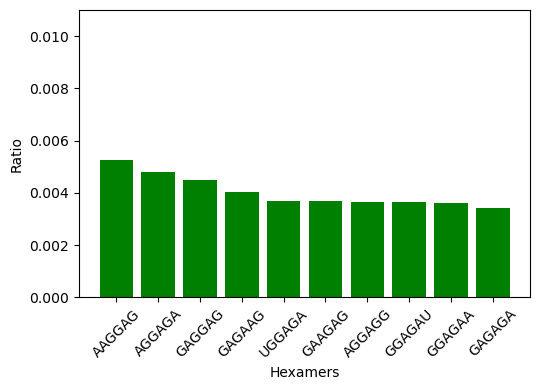

In [38]:
hexamers = [hexamer for hexamer, ratio in top_hexamers]
ratios = [ratio for hexamer, ratio in top_hexamers]

plt.figure(figsize=(5.5, 4))
plt.bar(hexamers, ratios, color='green')
plt.xlabel('Hexamers')
plt.ylabel('Ratio')
plt.ylim(0,0.011)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()